<a href="https://colab.research.google.com/github/Suemy-AZ/Modulo_2/blob/main/M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive  # importa libreria
drive.mount("/content/gdrive");  # utiliza comando
#!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive/7mo semestre/AD2022"
#!ls
import pandas as pd # importar libreria
columns = ["class","alcohol","malic","ash", "alcalinity","Mg","tphenols","flav","nonflav","proantho","color","hue","diluted","proline"]
# Open the file and create the data frame
df = pd.read_csv('wine.data',names = columns)
df.head()

Mounted at /content/gdrive
/content/gdrive/MyDrive/7mo semestre/AD2022


,class,alcohol,malic,ash,alcalinity,Mg,tphenols,flav,nonflav,proantho,color,hue,diluted,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Dividir en clasificador por clase

```
# Esto tiene formato de código
```



In [35]:
import numpy as np
x= df[["alcohol"]].to_numpy()
y= df[["class"]].to_numpy()

from sklearn.model_selection import train_test_split


c1=np.where(df["class"] == 1, 1,0 )
c2=np.where(df["class"] == 2, 1,0 )
c3=np.where(df["class"] == 3, 1,0 )

x_c1t, x_c1v, y_c1t, y_c1v = train_test_split(x,c1,random_state=0)
x_c2t, x_c2v, y_c2t, y_c2v = train_test_split(x,c2,random_state=0)
x_c3t, x_c3v, y_c3t, y_c3v = train_test_split(x,c3,random_state=0)


## Definiendo las funciones

In [10]:
def orden1 (x_train,y_train,theta,alpha,h,j_i):
  for idx in range (1000):
    acumDelta =[]
    acumDeltaX=[]
    for x_i, y_i in zip (x_train,y_train):
      acumDelta.append(h(x_i,theta)-y_i)
      acumDeltaX.append ((h(x_i,theta)-y_i)*x_i)

    sJt0=sum(acumDelta)
    sJt1=sum(acumDeltaX)
   #Gradiente descendiente para optimización de theta
    theta[0]= theta[0]-alpha/n*sJt0 
    theta[1]=theta[1]-alpha/n*sJt1
  print(theta)
  return theta

def orden2 (x_train,y_train,x2_train,theta,alpha,h,j_i):
  for idx in range (1000):
    acumDelta =[]
    acumDeltaX=[]
    acumDeltaX2=[]
    for x_i, y_i,x2_i in zip (x_train,y_train,x2_train):
      acumDelta.append(h(x_i,theta)-y_i)
      acumDeltaX.append ((h(x_i,theta)-y_i)*x_i)
      acumDeltaX.append ((h(x2_i,theta)-y_i)*x2_i)

    sJt0=sum(acumDelta)
    sJt1=sum(acumDeltaX)
    sJt2=sum(acumDeltaX2)
   #Gradiente descendiente para optimización de theta
    theta[0]= theta[0]-alpha/n*sJt0
    theta[1]=theta[1]-alpha/n*sJt1
    theta[2]=theta[2]-alpha/n*sJt2
  return theta

def validate(x_c1t,y_c1t,x_c1v,y_c1v,theta):
  n_train = len(y_c1v)
  n_val = len(y_c1t)

  # Validación
  acumDelta = []
  for x_i, y_i in zip(x_c1t,y_c1t):
    acumDelta.append(j_i(x_i,y_i,theta))  

  sDelta = sum(acumDelta)  
  J_validate = 1/(2*n_val)*sDelta


  # Training
  acumDelta = []
  for x_i, y_i in zip(x_c1v,y_c1v):
    acumDelta.append(j_i(x_i,y_i,theta))  

  sDelta = sum(acumDelta)  
  J_train = 1/(2*n_train)*sDelta

  print(J_validate)
  print(J_train)
  return J_validate,J_train

# Orden 1

In [34]:
from math import e
h= lambda x,theta : theta[0]+theta[1]*x #Definimos la ecuación lineal de orden 1
#h=lambda x, theta : 1/(1+e**(-(theta[0]+theta[1]*x)))
j_i = lambda x,y,theta : (y-h(x,theta))**2 #Función de costo

theta11=orden1(x_c1t,y_c1t,[1,1],0.0001,h,j_i)
theta21=orden1(x_c2t,y_c2t,[1,1],0.0001,h,j_i)
theta31=orden1(x_c3t,y_c3t,[1,1],0.0001,h,j_i)

validate(x_c1t,y_c1t,x_c1v,y_c1v,theta11)
validate(x_c2t,y_c2t,x_c2v,y_c2v,theta21)
validate(x_c3t,y_c3t,x_c3v,y_c3v,theta31)

[array([0.93153224]), array([-0.03708994])]
[array([0.93451719]), array([-0.03642027])]
[array([0.93441712]), array([-0.04142575])]
[0.12649554]
[0.13138884]
[0.11136321]
[0.11897807]
[0.09639227]
[0.07522267]


(array([0.09639227]), array([0.07522267]))

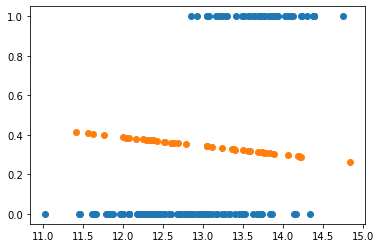

In [19]:
import matplotlib.pyplot as pt

pt.scatter(x_c1t,y_c1t)
pt.scatter(x_c1v,h(x_c1v,theta11))


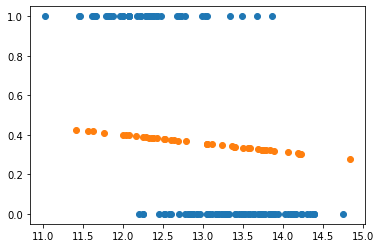

In [20]:
pt.scatter(x_c2t,y_c2t)
pt.scatter(x_c2v,h(x_c2v,theta21))

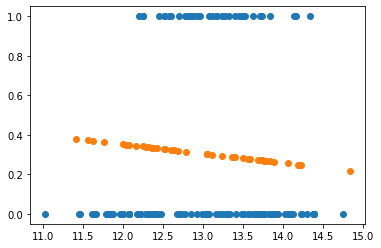

In [21]:
pt.scatter(x_c3t,y_c3t)
pt.scatter(x_c3v,h(x_c3v,theta31))

In [22]:
x0=x[150]  
y0=y[150]

print(x0)

print(h(x0,theta11))
print(h(x0,theta21))
print(h(x0,theta31))

print(y0)

[13.5]
[0.32143385]
[0.33570151]
[0.28209679]
[3]


# Orden 2

In [ ]:
#Definir variable x2 como la característica
import numpy as np
from sklearn.model_selection import train_test_split
x2= df[["diluted"]].to_numpy()


x_c1t, x_c1v, y_c1t, y_c1v = train_test_split(x,c1,random_state=0)
x_c2t, x_c2v, y_c2t, y_c2v = train_test_split(x,c2,random_state=0)
x_c3t, x_c3v, y_c3t, y_c3v = train_test_split(x,c3,random_state=0)

from math import e
h2= lambda x,x2,theta : theta[0]+theta[1]*x+ theta[2]*x2 #Definimos la ecuación de orden 2
#h=lambda x, theta : 1/(1+e**(-(theta[0]+theta[1]*x)))
j2_i = lambda x,x2,y,theta : (y-h2(x,x2,theta))**2 #Función de costo

theta12=orden2(x_c1t,y_c1t,[1,1,1],0.0001,h2,j2_i)
theta22=orden2(x_c2t,y_c2t,[1,1,1],0.0001,h2,j2_i)
theta32=orden2(x_c3t,y_c3t,[1,1,1],0.0001,h2,j2_i)

validate(x_c1t,y_c1t,x_c1v,y_c1v,)
validate(x_c2t,y_c2t,x_c2v,y_c2v,)
validate(x_c3t,y_c3t,x_c3v,y_c3v,)

In [37]:
#Definir variable x2 como la característica
import numpy as np
from sklearn.model_selection import train_test_split
x2= df[["diluted"]].to_numpy()

x= np.concatenate((x, x2), axis=1)

# Clasificador con todo

In [ ]:

h1= lambda x,theta : theta[0]+theta[1]*x #Definimos la ecuación
h1= lambda x,theta : theta[0]+theta[1]*x #Definimos la ecuación
j_i = lambda x,y,theta : (y-h(x,theta))**2 #Función de costo

theta = [1,1] #theta arbitrario inicial
alpha=0.00001 # alpha arbitraria inicial

for idx in range (1000):
  acumDelta =[]
  acumDeltaX=[]
  for x_i, y_i in zip (x_train,y_train):
    acumDelta.append(h(x_i,theta)-y_i)
    acumDeltaX.append ((h(x_i,theta)-y_i)*x_i)

  sJt0=sum(acumDelta)
  sJt1=sum(acumDeltaX)
  #Gradiente descendiente para optimización de theta
  theta[0]= theta[0]-alpha/n*sJt0 
  theta[1]=theta[1]-alpha/n*sJt1

print(theta)

[array([0.94927822]), array([0.33626573])]


In [ ]:
n_train = len(y_train)
n_val = len(y_test)

# Validación
acumDelta = []
for x_i, y_i in zip(x_test,y_test):
  acumDelta.append(j_i(x_i,y_i,theta))  

sDelta = sum(acumDelta)  
J_validate = 1/(2*n_val)*sDelta


# Training
acumDelta = []
for x_i, y_i in zip(x_train,y_train):
  acumDelta.append(j_i(x_i,y_i,theta))  

sDelta = sum(acumDelta)  
J_train = 1/(2*n_train)*sDelta

print(J_validate)
print(J_train)
print(theta)

[6.48740961]
[6.00400981]
[array([0.94927822]), array([0.33626573])]


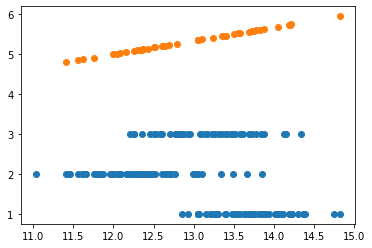

In [ ]:
import matplotlib.pyplot as pt

pt.scatter(x_test,h(x_test,theta))

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_train=h(x_train,theta)
y_pred_test=h(x_test,theta)

#print(confusion_matrix(y_train, y_pred_train))

#print(confusion_matrix(y_test, y_pred_test))
y_pred_test

array([[5.56956937],
       [5.25011692],
       [5.10888532],
       [5.50904154],
       [5.33754601],
       [4.83651007],
       [5.6771744 ],
       [5.10552266],
       [5.06853343],
       [5.01136825],
       [5.44178839],
       [5.61664657],
       [5.7242516 ],
       [5.10888532],
       [5.51576685],
       [4.984467  ],
       [5.57629468],
       [5.72088895],
       [5.19967706],
       [5.59983328],
       [5.35772196],
       [5.33754601],
       [5.4014365 ],
       [5.15596252],
       [5.09543469],
       [5.15932518],
       [5.12906126],
       [5.03826951],
       [4.90376322],
       [5.58302   ],
       [5.45187636],
       [5.73097692],
       [4.99791762],
       [5.72761426],
       [5.93609902],
       [5.33754601],
       [5.55275608],
       [5.21649035],
       [4.85668602],
       [5.45523902],
       [5.48886559],
       [5.56620671],
       [5.08198406],
       [5.18622643],
       [4.78607021]])